## Modelos de Regresión Lineal
# Datos simulados

y = a + b * x

x : 100 valores distribuidos según una N(1.5, 2.5)

ye = 2 + 1.8*x + e

e está distribuida según N(0, 0.8)

In [71]:
import pandas as pd
import numpy as np

In [72]:
x  = 1.5 + 2.5*np.random.randn(100)

In [73]:
res = 2.8*np.random.randn(100)

In [74]:
y_pred = 2 + 1.8*x

In [75]:
y_act = 2 + 1.8*x + res

In [76]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()
y_mean_list = [np.mean(y_act) for i in range(len(x_list))]

In [77]:
y_mean_list

[5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,
 5.180403030877937,


In [78]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list,
        "y_mean": y_mean_list
    }
)

In [79]:
data

,x,y_actual,y_prediccion,y_mean
0,-0.174381,4.960932,1.686114,5.180403
1,-0.060071,10.247850,1.891873,5.180403
2,7.642522,14.243405,15.756539,5.180403
3,0.095960,1.120205,2.172728,5.180403
4,2.015895,7.470425,5.628611,5.180403
...,...,...,...,...
95,-1.814465,-0.466681,-1.266037,5.180403
96,-2.549994,-5.776380,-2.589989,5.180403
97,2.577602,7.524986,6.639684,5.180403
98,3.104919,14.236456,7.588853,5.180403


Text(0.5, 1.0, 'Valor Actual vs Predicción')

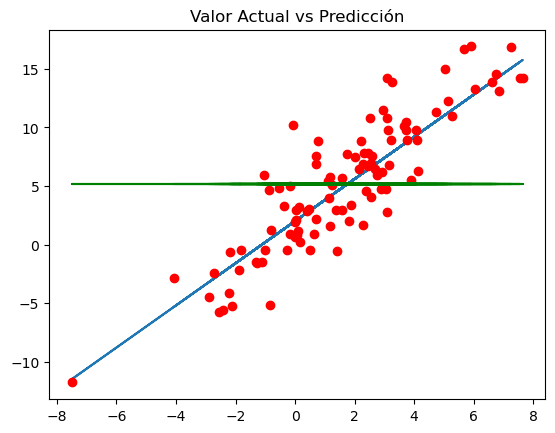

In [80]:
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean_list, "g")
plt.title ("Valor Actual vs Predicción")

In [81]:
data ["SSR"] = (data["y_prediccion"]-data["y_mean"])**2
data ["SST"] = (data["y_actual"]-data["y_mean"])**2
data ["SSERROR"] = (data["y_actual"]-data["y_prediccion"])**2

In [82]:
SSR = np.sum(data["SSR"])
SST = np.sum(data["SST"])
SSERROR = np.sum(data["SSERROR"])


In [83]:
SSR

2342.387549130949

In [84]:
SSERROR

707.8365719801899

In [85]:
SST

3280.093675546312

In [86]:
data.head()

,x,y_actual,y_prediccion,y_mean,SSR,SST,SSERROR
0,-0.174381,4.960932,1.686114,5.180403,12.210058,0.048168,10.724435
1,-0.060071,10.247850,1.891873,5.180403,10.814432,25.679014,69.822350
2,7.642522,14.243405,15.756539,5.180403,111.854658,82.138001,2.289576
3,0.095960,1.120205,2.172728,5.180403,9.046109,16.485205,1.107804
4,2.015895,7.470425,5.628611,5.180403,0.200890,5.244200,3.392278


In [87]:
R2= SSR/SST
R2

0.7141221504110902

(array([ 1.,  3.,  6.,  7., 11., 26., 21., 14.,  7.,  4.]),
 array([-8.35597692e+00, -6.96226661e+00, -5.56855630e+00, -4.17484599e+00,
        -2.78113568e+00, -1.38742537e+00,  6.28494051e-03,  1.39999525e+00,
         2.79370556e+00,  4.18741587e+00,  5.58112618e+00]),
 <BarContainer object of 10 artists>)

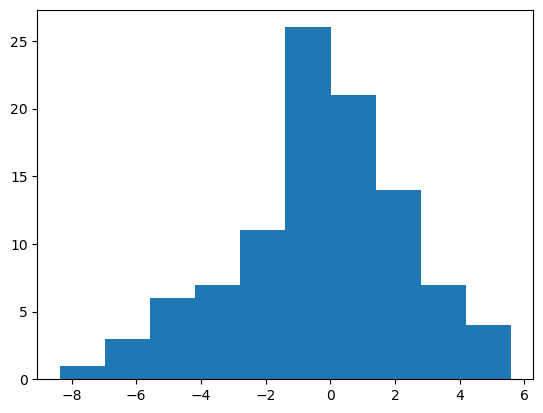

In [88]:
plt.hist(data["y_prediccion"]-data["y_actual"])

In [89]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.6178994116622434, 5.180403030877937)

In [90]:
data["beta_n"] = (data["x"] - x_mean)* (data["y_actual"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2
beta = sum(data["beta_n"])/sum(data["beta_d"])
alpha = y_mean - beta*x_mean
alpha, beta

(2.115879610191001, 1.8941371747817244)

Modelo lineal obtenido :
y = 1.8681633529107406 + 1.8306276894810822 * x

In [91]:
data["y_model"] = alpha + beta*data["x"]

In [92]:
data.head()

,x,y_actual,y_prediccion,y_mean,SSR,SST,SSERROR,beta_n,beta_d,y_model
0,-0.174381,4.960932,1.686114,5.180403,12.210058,0.048168,10.724435,0.393354,3.212270,1.785578
1,-0.060071,10.247850,1.891873,5.180403,10.814432,25.679014,69.822350,-8.503024,2.815584,2.002097
2,7.642522,14.243405,15.756539,5.180403,111.854658,82.138001,2.289576,54.601163,36.296075,16.591864
3,0.095960,1.120205,2.172728,5.180403,9.046109,16.485205,1.107804,6.179375,2.316299,2.297641
4,2.015895,7.470425,5.628611,5.180403,0.200890,5.244200,3.392278,0.911419,0.158400,5.934261


In [93]:
data ["SSR"] = (data["y_model"]-data["y_mean"])**2
data ["SST"] = (data["y_actual"]-data["y_mean"])**2
data ["SSERROR"] = (data["y_actual"]-data["y_model"])**2

In [94]:
SSR = np.sum(data["SSR"])
SST = np.sum(data["SST"])
SSERROR = np.sum(data["SSERROR"])
SSR, SSERROR, SST

(2585.8364270877073, 694.2572484586085, 3280.093675546312)

In [95]:
SSR + SSERROR

3280.093675546316

Text(0.5, 1.0, 'Valor Actual vs Predicción')

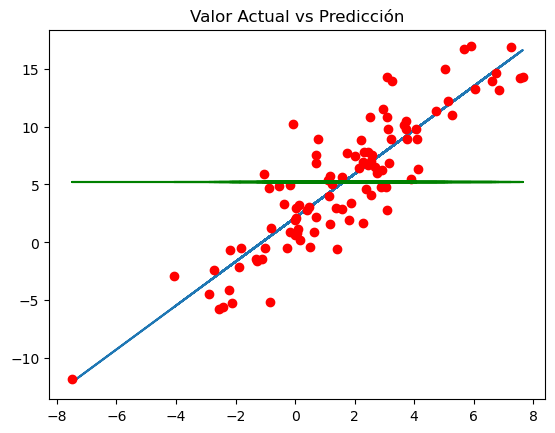

In [96]:
plt.plot(x,data["y_model"])
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean_list, "g")
plt.title ("Valor Actual vs Predicción")

In [97]:
R2= SSR/SST
R2

0.7883422496026814